# TP_Clustering

##### Imports

In [66]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from matplotlib import cm
from apyori import apriori
import pysubgroup as ps
warnings.filterwarnings('ignore')

##### Chargement des données

In [67]:
datas = pd.read_csv('./flickr_data.csv', sep=',', error_bad_lines=False)
X = datas.values
print(datas.head(4))

b'Skipping line 1555: expected 16 fields, saw 17\nSkipping line 3691: expected 16 fields, saw 17\n'
b'Skipping line 74107: expected 16 fields, saw 18\nSkipping line 74108: expected 16 fields, saw 18\nSkipping line 75320: expected 16 fields, saw 17\nSkipping line 75323: expected 16 fields, saw 17\nSkipping line 78506: expected 16 fields, saw 17\nSkipping line 78516: expected 16 fields, saw 17\nSkipping line 78517: expected 16 fields, saw 17\nSkipping line 78518: expected 16 fields, saw 17\nSkipping line 78519: expected 16 fields, saw 17\nSkipping line 78520: expected 16 fields, saw 17\nSkipping line 80008: expected 16 fields, saw 17\nSkipping line 81821: expected 16 fields, saw 17\n'


            id           user        lat      long  \
0  22653655033   77161041@N00  45.768121  4.801776   
1  22884818287  113280318@N03  45.759700  4.842200   
2  23277598065  132999708@N08  46.027633  4.699855   
3  22883485267  132999708@N08  46.027572  4.699966   

                                                tags  \
0  square,sierra,squareformat,iphoneography,insta...   
1  square,squareformat,iphoneography,instagramapp...   
2                                                NaN   
3                                                NaN   

                                               title   date_taken_minute  \
0             Enfin. #instabeer #beer #chimay #apero                  46   
1  https://www.facebook.com/PascalFrontiPhotograp...                   3   
2                         compagnons_dev_arnas20 (1)                   0   
3                         compagnons_dev_arnas20 (3)                   1   

    date_taken_hour   date_taken_day   date_taken_month   date_take

### Prétraitements

In [68]:
print(datas.shape)
datas = datas.drop_duplicates()
print(datas.shape)
datas_numpy = datas.values
tags = datas[" tags"]
X=[]

for index in range(0,len(tags)):
    print(index)
    try :
        line = str(tags[index]).split(",")
    except KeyError: 
        continue
    else :
        if "lyon" in line:
            X.append(datas_numpy[index])
X = np.array(X)
datas = pd.DataFrame(data=X, columns=datas.columns)
print(datas.head)

(83837, 16)
(15202, 16)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
27

3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464


6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377
6378
6379
6380
6381
6382
6383
6384
6385
6386
6387
6388
6389
6390
6391
6392
6393
6394
6395
6396
6397
6398
6399
6400
6401
6402
6403
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6416
6417
6418
6419
6420
6421
6422
6423
6424
6425
6426
6427
6428
6429
6430
6431
6432
6433
6434
6435
6436
6437
6438
6439
6440
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463


9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462


10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
1092

12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12390
12391
12392
12393
12394
12395
12396
12397
12398
12399
12400
12401
12402
12403
12404
12405
12406
12407
12408
12409
12410
12411
12412
12413
12414
12415
12416
12417
12418
12419
12420
12421
12422
12423
12424
12425
12426
12427
1242

13761
13762
13763
13764
13765
13766
13767
13768
13769
13770
13771
13772
13773
13774
13775
13776
13777
13778
13779
13780
13781
13782
13783
13784
13785
13786
13787
13788
13789
13790
13791
13792
13793
13794
13795
13796
13797
13798
13799
13800
13801
13802
13803
13804
13805
13806
13807
13808
13809
13810
13811
13812
13813
13814
13815
13816
13817
13818
13819
13820
13821
13822
13823
13824
13825
13826
13827
13828
13829
13830
13831
13832
13833
13834
13835
13836
13837
13838
13839
13840
13841
13842
13843
13844
13845
13846
13847
13848
13849
13850
13851
13852
13853
13854
13855
13856
13857
13858
13859
13860
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13886
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13922
13923
13924
13925
13926
1392

<bound method NDFrame.head of                id           user      lat     long  \
0     23243740796  129394312@N07  45.7634  4.84987   
1     22642697483   19710808@N05  45.7393  4.81424   
2     22864095577   36030103@N07  45.7677  4.83343   
3     22886328439   47009524@N04  45.7664  4.82865   
4     22625834324   47009524@N04  45.7661  4.83041   
...           ...            ...      ...      ...   
1751  21196980258   42140157@N02  45.7499  4.85246   
1752  21372771752  127280857@N08  45.7624  4.82176   
1753  22837624510   66354547@N08   45.766  4.83061   
1754  12437671143   46469948@N02   45.772  4.82449   
1755  12437535645   46469948@N02  45.7569  4.82447   

                                                   tags  \
0     france,architecture,lyon,offices,appartments,i...   
1     orange,building,architecture,lyon,edificio,arc...   
2     horses,france,statue,canon,square,lyon,t3i,600...   
3                                france,lyon,rhonealpes   
4                         

In [69]:
BBox = ((datas[" long"].min(), datas[" long"].max(), datas[" lat"].min(), datas[" lat"].max()))
print(BBox)

(4.48064, 5.209128, 45.521988, 46.00843)


#### La Visualisation

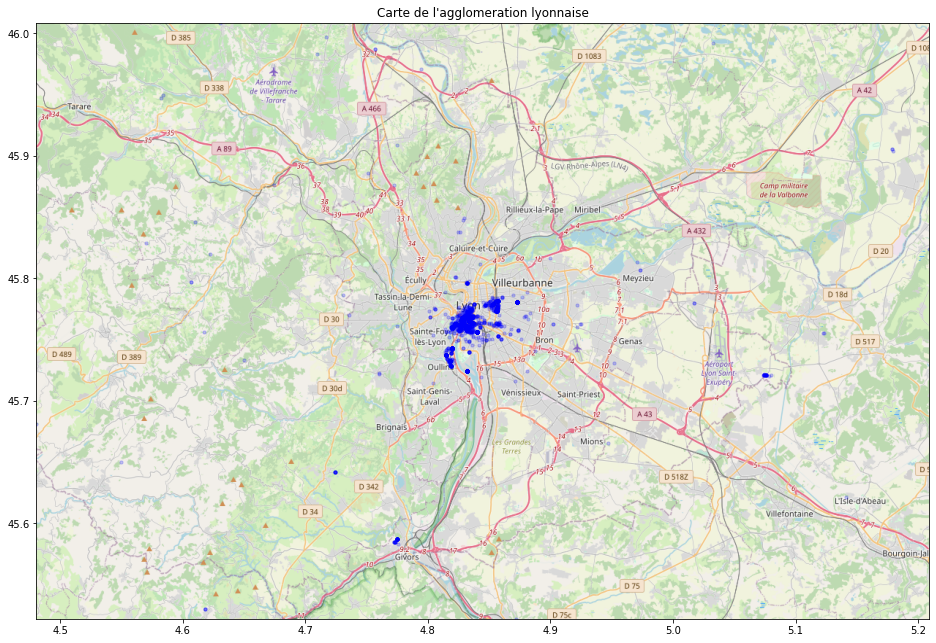

In [70]:
carte = plt.imread('./map.png')
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(datas[" long"], datas[" lat"], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')

#### Le clustering

> On ne peut pas utiliser les K-Means, on ne connait pas le nombre de clusters. On va utiliser un algorithme qui se base sur la densité : DBSCAN.

In [91]:
dbscan = DBSCAN(eps=0.00001, min_samples=1)
lat = datas.iloc[:,2:3].values
long = datas.iloc[:,3:4].values
locations = datas.iloc[:,2:4].values
print(locations.shape)
clustering = dbscan.fit(locations)
print(clustering.labels_)

(1756, 2)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  20  21  22  23  23  23  23  24  25  26  25  27  28  23  23
  23  23  29  23  23  23  23  30  31  32  33  33  33  33  33  33  33  33
  33  33  33  33  33  33  33  33  33  24  34  19  35  36  35  37  38  39
  40  41  42  43  44  42  45  46  47  48  49  49  49  49  49  50  49  51
  52  53  54  55  56  55  56  57  58  58  59  59  59  60  49  49  49  61
  49  62  63  64  65  66  67  68  42  43  69  70  59  59  59  59  59  59
  59  59  59  71  72  73  74  75  76  77  78  78  78  78  78  78  78  78
  78  78  78  53  53  53  79  79  80  59  59  59  59  59  59  59  59  59
  53  53  53  81  82  83  84  85  86  38  38  38  87  87  87  88  89  90
  91  92  93  94  95  96  87  97  87  87  87  98  98  99 100 101 102 101
 101 101 103 104 105 106 107 108 109 110 111 112 113 112 114 115 116 117
 118 119 119 120 121 122  59  59  59 123 124 125 126 127 128 129 101 128
 101 101 101 130 131 132 133 134 135 136 

#### Visualisation du clustering

In [92]:
print(long.shape)
print(lat.shape)
print(clustering.labels_.shape)

ResultDict = {}
ResultDictLong = {}
ResultDictLat = {}
for index in range(0,len(clustering.labels_)):
    if not clustering.labels_[index] in ResultDict:
        ResultDict[clustering.labels_[index]] = []
        ResultDictLong[clustering.labels_[index]] = []
        ResultDictLat[clustering.labels_[index]] = []
    ResultDict[clustering.labels_[index]].append(np.array([long[index][0],lat[index][0]]))
    ResultDictLong[clustering.labels_[index]].append(long[index][0])
    ResultDictLat[clustering.labels_[index]].append(lat[index][0])
print(ResultDictLat[0])
print(ResultDict.keys())
print(ResultDictLong.keys())
print(ResultDictLat.keys())
print(ResultDict)

(1756, 1)
(1756, 1)
(1756,)
[45.763428999999995]
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 

{0: [array([ 4.849875, 45.763429])], 1: [array([ 4.814243, 45.739289])], 2: [array([ 4.833426, 45.76768 ])], 3: [array([ 4.82865 , 45.766411])], 4: [array([ 4.830411, 45.76613 ])], 5: [array([ 4.826677, 45.757019])], 6: [array([ 4.833261, 45.757411])], 7: [array([ 4.825838, 45.758544])], 8: [array([ 4.823827, 45.758241])], 9: [array([ 4.823333, 45.758113])], 10: [array([ 4.822825, 45.761963])], 11: [array([ 4.821797, 45.762227])], 12: [array([ 4.826811, 45.762966])], 13: [array([ 4.826908, 45.762947])], 14: [array([ 4.853981, 45.761353])], 15: [array([ 4.833576, 45.764738])], 16: [array([ 4.835293, 45.773622])], 17: [array([ 4.833093, 45.776039]), array([ 4.833093, 45.776039])], 18: [array([ 4.835454, 45.773906]), array([ 4.835454, 45.773906])], 19: [array([ 4.835969, 45.77596 ]), array([ 4.835969, 45.77596 ])], 20: [array([ 4.834697, 45.774475]), array([ 4.834697, 45.774475])], 21: [array([ 4.830521, 45.755195])], 22: [array([ 4.817934, 45.731797])], 23: [array([ 4.831872, 45.79618 ])

In [93]:
colors = cm.rainbow(np.linspace(0, 1, len(ResultDict.keys())))

colorsDict = {}
index = 0
for key in ResultDict:
    colorsDict[key] = colors[index]
    index +=1

print(colors)
print(colorsDict)

[[0.5        0.         1.         1.        ]
 [0.5        0.         1.         1.        ]
 [0.5        0.         1.         1.        ]
 [0.5        0.         1.         1.        ]
 [0.49215686 0.01231966 0.99998103 1.        ]
 [0.49215686 0.01231966 0.99998103 1.        ]
 [0.49215686 0.01231966 0.99998103 1.        ]
 [0.48431373 0.02463745 0.99992411 1.        ]
 [0.48431373 0.02463745 0.99992411 1.        ]
 [0.48431373 0.02463745 0.99992411 1.        ]
 [0.48431373 0.02463745 0.99992411 1.        ]
 [0.47647059 0.0369515  0.99982925 1.        ]
 [0.47647059 0.0369515  0.99982925 1.        ]
 [0.47647059 0.0369515  0.99982925 1.        ]
 [0.46862745 0.04925994 0.99969645 1.        ]
 [0.46862745 0.04925994 0.99969645 1.        ]
 [0.46862745 0.04925994 0.99969645 1.        ]
 [0.46862745 0.04925994 0.99969645 1.        ]
 [0.46078431 0.06156091 0.99952572 1.        ]
 [0.46078431 0.06156091 0.99952572 1.        ]
 [0.46078431 0.06156091 0.99952572 1.        ]
 [0.45294118 

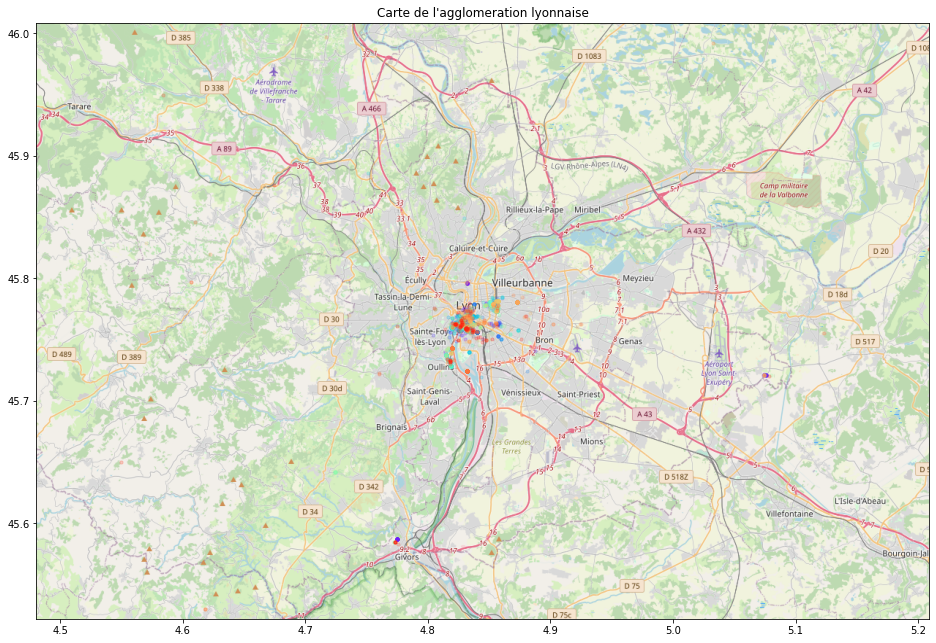

In [94]:

carte = plt.imread('./map.png')
fig, ax = plt.subplots(figsize = (16,14))
for key in ResultDict:
    ax.scatter(ResultDictLong[key], ResultDictLat[key], zorder=1, alpha= 0.2, color=colorsDict[key], s=10)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')

In [75]:
print(datas.shape)
print(clustering.labels_.shape)

(1756, 16)
(1756,)


In [76]:
print(datas.shape)
#results = list(apriori(datas))
print(results[len(results)-1])

(1756, 16)
RelationRecord(items=frozenset({'a', 'd', 'p', 'm', 'e', 't', '_', ' ', 'o', 'u', 'l', 'n'}), support=0.125, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'a', 'd', 'p', 'm', 'e', 't', '_', ' ', 'o', 'u', 'l', 'n'}), confidence=0.125, lift=1.0), OrderedStatistic(items_base=frozenset({' '}), items_add=frozenset({'a', 'd', 'p', 'm', 'e', 't', '_', 'o', 'u', 'l', 'n'}), confidence=0.13333333333333333, lift=1.0666666666666667), OrderedStatistic(items_base=frozenset({'_'}), items_add=frozenset({'a', 'd', 'p', 'm', 'e', 't', ' ', 'o', 'u', 'l', 'n'}), confidence=0.2, lift=1.6), OrderedStatistic(items_base=frozenset({'a'}), items_add=frozenset({'d', 'p', 'm', 'e', 't', '_', ' ', 'o', 'u', 'l', 'n'}), confidence=0.16666666666666666, lift=1.3333333333333333), OrderedStatistic(items_base=frozenset({'d'}), items_add=frozenset({'a', 'p', 'm', 'e', 't', '_', ' ', 'o', 'u', 'l', 'n'}), confidence=0.18181818181818182, lift=1.4545454545454546), OrderedSta

In [77]:
datasWithClustering = []
for index in range(0,datas.shape[0]):
    tmp = np.array([])
    tmp = np.append(tmp,datas.values[index])
    tmp = np.append(tmp,clustering.labels_[index])
    #tmp[index].append(clustering.labels_[index])
    datasWithClustering.append(tmp)
print(datasWithClustering)

[array([23243740796, '129394312@N07', 45.763428999999995, 4.849875,
       'france,architecture,lyon,offices,appartments,incity,albertconstantin,valodepistre,jeanzumbrunnen,denisvalode,marcelgut,jeansillan,monceynord',
       'InCity, Lyon, France, 2015', 11, 16, 7, 9, 2015, 21, 9, 24, 11,
       2015, -1], dtype=object), array([22642697483, '19710808@N05', 45.739289, 4.814243,
       'orange,building,architecture,lyon,edificio,architettura,arancione',
       nan, 29, 12, 25, 6, 2015, 12, 9, 24, 11, 2015, -1], dtype=object), array([22864095577, '36030103@N07', 45.76768, 4.833426,
       'horses,france,statue,canon,square,lyon,t3i,600d,gsamie,guillaumesamie',
       'Lyon 3', 45, 1, 31, 10, 2015, 54, 23, 23, 11, 2015, -1],
      dtype=object), array([22886328439, '47009524@N04', 45.766411, 4.82865,
       'france,lyon,rhonealpes', '20150821-Canon EOS 6D-5405', 57, 19, 21,
       8, 2015, 10, 21, 23, 11, 2015, -1], dtype=object), array([22625834324, '47009524@N04', 45.76613, 4.830411,
  

In [65]:
task = ps.SubgroupDiscoveryTask (
    datas, 
    clustering.labels_, 
    datasWithClustering, 
    result_set_size=5, 
    depth=2, 
    qf=ps.WRAccQF())
result = ps.BeamSearch().execute(task)

AssertionError: 